<a href="https://colab.research.google.com/github/Yaki-55/machineLearning/blob/main/apuntesRedNeuronalConvolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Podremos hacer que la computadora reconozca un número escrito a mano?**

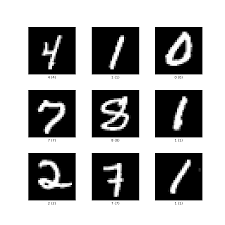

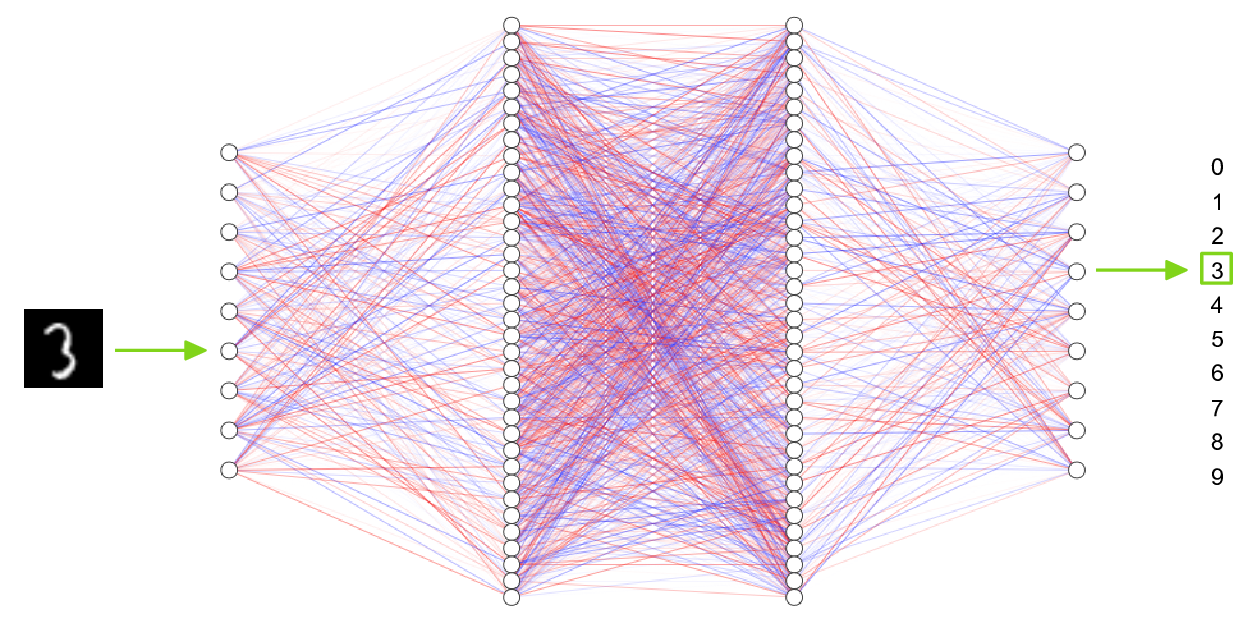

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
# read train
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# read test
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

In [ ]:
Y_train

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

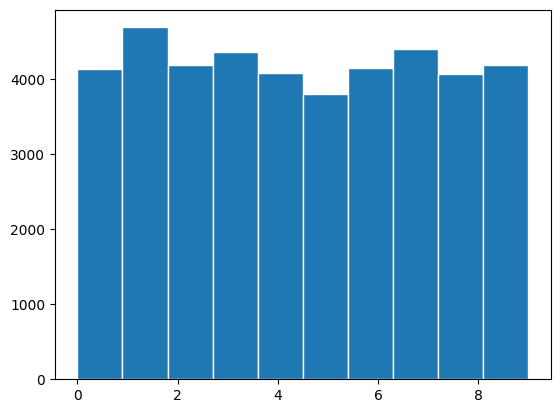

In [ ]:
fig, ax = plt.subplots()
ax.hist(Y_train, edgecolor = "white")

<Axes: xlabel='label', ylabel='Count'>

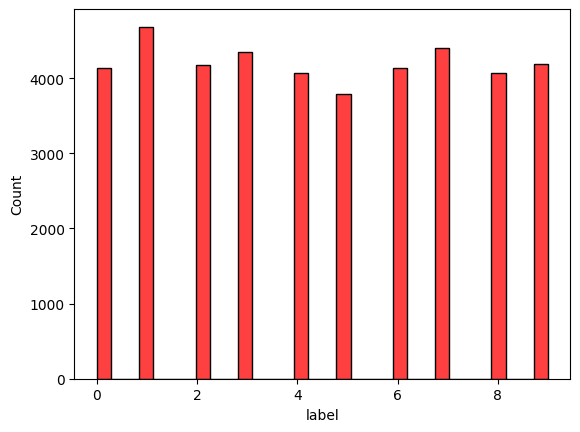

In [ ]:
sns.histplot(data=Y_train, color = "red")

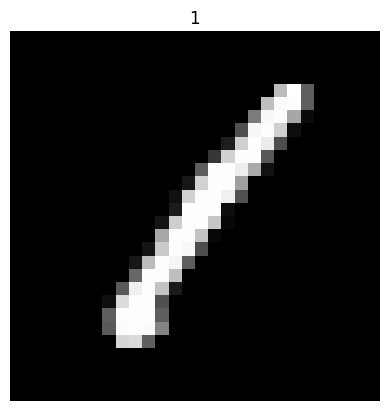

In [ ]:
# plot some samples
img = X_train.iloc[0].to_numpy() # Changed as_matrix() to to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

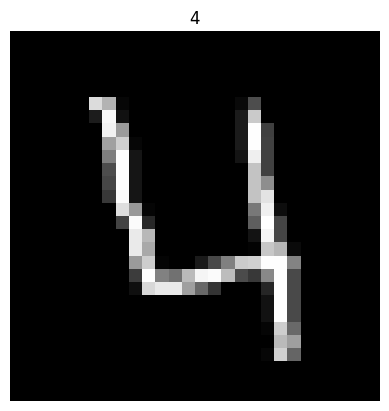

In [ ]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [ ]:
# Label Encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding, import from tensorflow.keras.utils
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


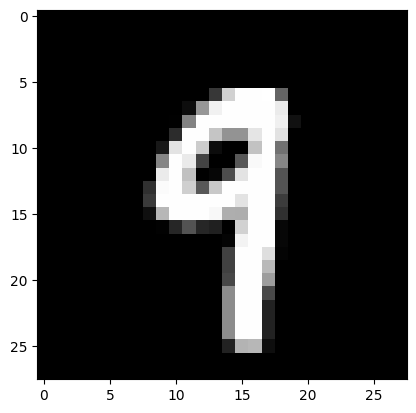

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

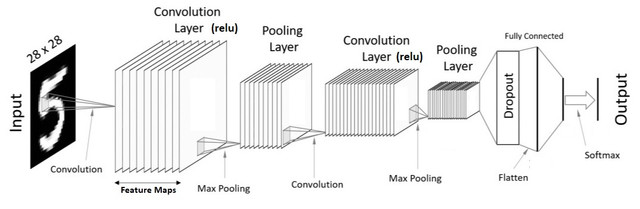

¿Qué es la operación de convolución?

Tenemos una imagen y un detector de características (3*3).

El detector de características no necesita ser una matriz de 3 x 3. Puede ser de 5 x 5 o de 7 x 7.

Detector de características = núcleo = filtro

El detector de características detecta características como bordes o formas convexas. Por ejemplo, si la entrada es un perro, el detector de características puede detectar características como la oreja o la cola del perro.

mapa de características = conv(imagen de entrada, detector de características). Multiplicación de matrices elemento por elemento.

mapa de características = característica convolucionada.

Paso = navegación en la imagen de entrada.

Reducimos el tamaño de la imagen. Esto es importante porque el código se ejecuta más rápido. Sin embargo, perdimos información.

Creamos múltiples mapas de características porque usamos múltiples detectores de características (filtros).

Veamos gimp. Detección de bordes: [0,10,0],[10,-4,10],[0,10,0]

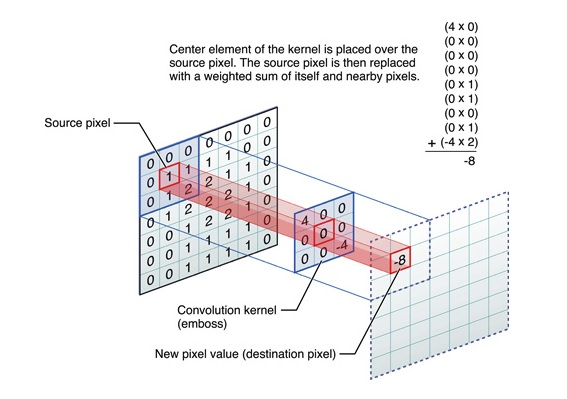

Después de tener una capa de convolución, usamos ReLU para romper la linealidad y aumentar la no linealidad, ya que las imágenes no son lineales.

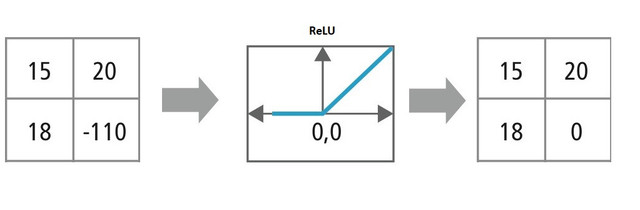

Mismo relleno

A medida que aplicamos capas de conversión, el tamaño del volumen disminuirá más rápido de lo que nos gustaría. En las primeras capas de nuestra red, queremos conservar la mayor cantidad de información posible sobre el volumen de entrada original para poder extraer esas características de bajo nivel.

El tamaño de entrada y el tamaño de salida son iguales.

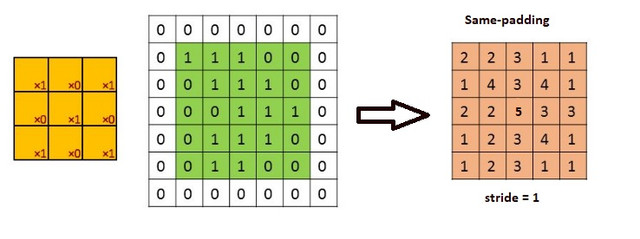

Agrupamiento máximo

Realiza un muestreo descendente o submuestreo (reduce la cantidad de parámetros).

Hace que la detección de características sea invariable a los cambios de escala u orientación.

Reduce la cantidad de parámetros y cálculos en la red y, por lo tanto, también controla el sobreajuste.

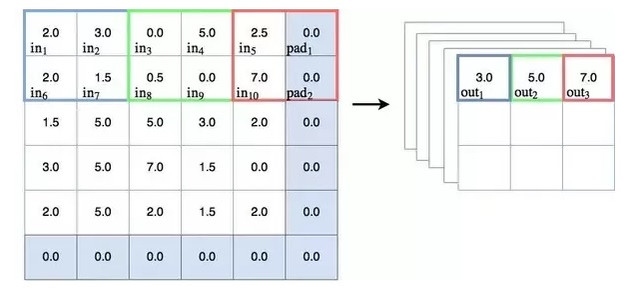

Aplastamiento

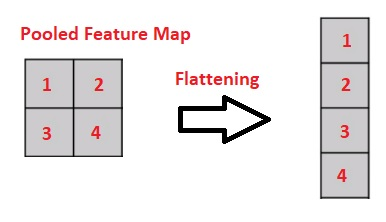

Conexión completa

Las neuronas de una capa completamente conectada tienen conexiones con todas las activaciones de la capa anterior.

Red neuronal artificial.

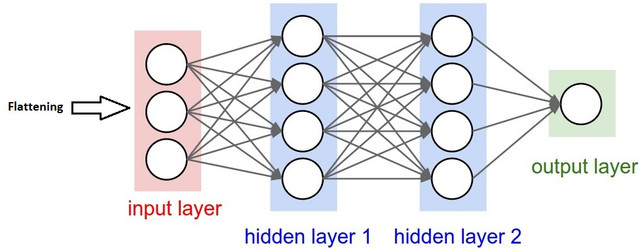

Implementando con Keras


Crear modelo

conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)

Abandono: el abandono es una técnica en la que las neuronas seleccionadas al azar se ignoran durante el entrenamiento.

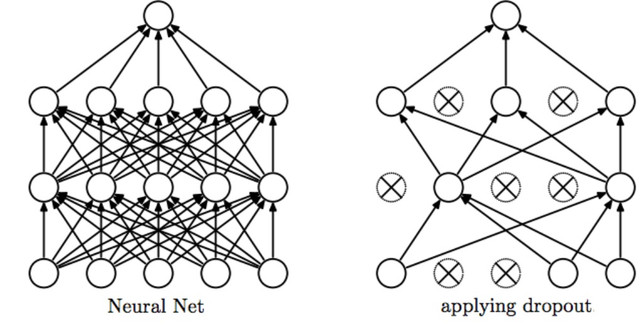

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator  <- This line caused the error.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from the correct location.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Definir optimizador

Optimizador Adam: cambia la tasa de aprendizaje.

In [ ]:
# Define the optimizer using learning_rate instead of lr
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Compilar modelo

Entropía cruzada categórica

Realizamos entropía cruzada binaria en partes anteriores y en el tutorial de aprendizaje automático.

En este momento, usamos entropía cruzada categórica. Eso significa que tenemos varias clases.

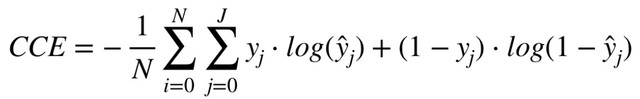

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Epochs and Batch Size

Digamos que tienes un conjunto de datos de 10 ejemplos (o muestras). Tienes un tamaño de lote de 2 y has especificado que quieres que el algoritmo se ejecute durante 3 épocas. Por lo tanto, en cada época, tienes 5 lotes (10/2 = 5). Cada lote pasa por el algoritmo, por lo tanto, tienes 5 iteraciones por época.

In [ ]:
epochs = 10  # for better result increase the epochs
batch_size = 250

Data Augmentation

Para evitar el problema del sobreajuste, necesitamos expandir artificialmente nuestro conjunto de datos de dígitos escritos a mano.

Modifique los datos de entrenamiento con pequeñas transformaciones para reproducir las variaciones de los dígitos.

Por ejemplo, el número no está centrado La escala no es la misma (algunos escriben con números grandes/pequeños) La imagen está rotada.

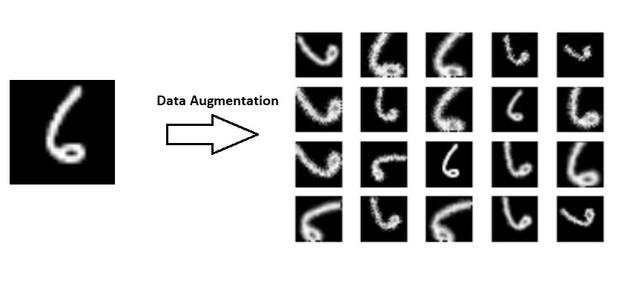

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 48s 272ms/step - accuracy: 0.4634 - loss: 1.5697 - val_accuracy: 0.9495 - val_loss: 0.2092
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8600 - loss: 0.5414 - val_accuracy: 0.9467 - val_loss: 0.2125
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 246ms/step - accuracy: 0.8515 - loss: 0.4588 - val_accuracy: 0.9643 - val_loss: 0.1289
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8920 - loss: 0.3818 - val_accuracy: 0.9650 - val_loss: 0.1289
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 247ms/step - accuracy: 0.8980 - loss: 0.3259 - val_accuracy: 0.9702 - val_loss: 0.1054
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9000 - loss: 0.2816 - val_accuracy: 0.9698 - val_loss: 0.1058
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 247ms/step - accuracy: 0.9195 - loss: 0.2614 - val_accuracy: 0.9724 - val_loss: 0.0920
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9200 - loss: 0.2339 - val_

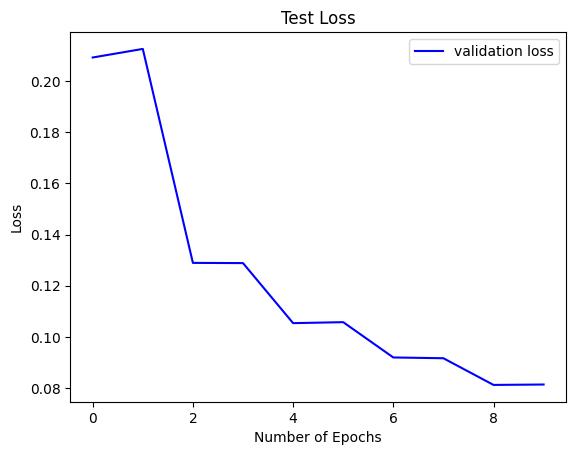

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


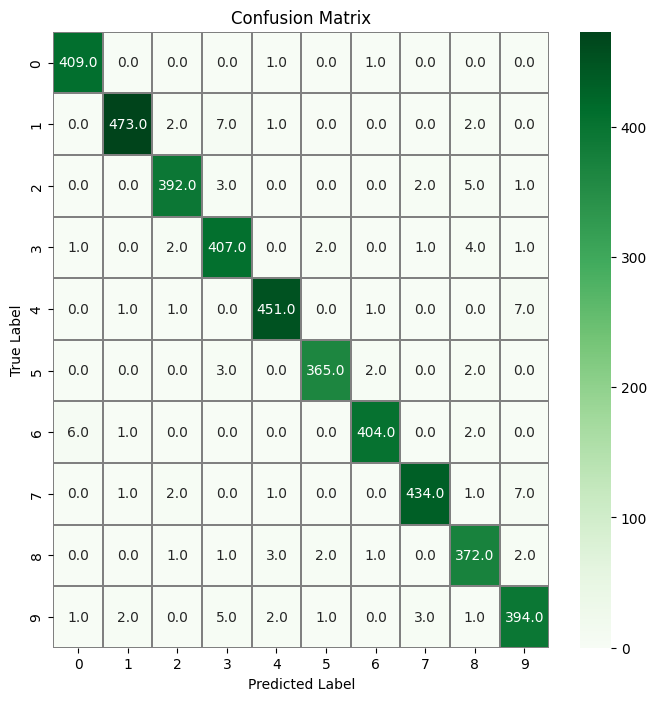

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()